regression analysis Pib-Percapita, Populacao, taxa de analfabetismo, quantidade de pessoas no bolsa familia, UF -2021
votos - 2022

In [72]:
import pandas as pd

criando o df

In [73]:
bolsa_familia = pd.read_csv('..\\misocial.csv', encoding='latin1')
votos_centrao = pd.read_csv('..\\Eleicao 2022\\votacoes_centrao.csv')
eleicoes_total = pd.read_csv('..\\Eleicao 2022\\eleitos_2022.csv')
analfabetismo = pd.read_csv('..\\taxa de analfabetismo\\analfabetismo.csv')

In [149]:
pib_municipios = pd.read_excel('PIB dos Municípios - base de dados 2010-2021.xlsx')
pib_2 = pd.read_excel('PIB dos Municípios - base de dados 2002-2009.xls')

In [150]:
pib_municipios = pd.concat([pib_municipios, pib_2])

In [74]:
votos_centrao.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO',
       'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'CD_SITUACAO_CANDIDATURA',
       'DS_SITUACAO_CANDIDATURA', 'CD_DETALHE_SITUACAO_CAND',
       'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'ST_VOTO_EM_TRANSITO', 'QT_VOTOS_NOMINAIS',
       'NM_TIPO_DESTINACAO_VOTOS', 'QT_VOTOS_NOMINAIS_VALIDOS',
       'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [75]:
votos_centrao_por_municipio = pd.pivot_table(votos_centrao, index='CD_MUNICIPIO', columns='NM_CANDIDATO', values='QT_VOTOS_NOMINAIS', aggfunc='sum', fill_value=0)
total = eleicoes_total.groupby('CD_MUNICIPIO')['QT_VOTOS_NOMINAIS'].sum()
votos_centrao_soma = votos_centrao_por_municipio.sum(axis=1)
percentage_votos_centrao = (votos_centrao_soma / total)
pib_2021 = pib_municipios[pib_municipios['Ano']==2021]

In [77]:
populacao = pib_2021['Produto Interno Bruto, \na preços correntes\n(R$ 1.000)'] / pib_2021['Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)']* 1000


In [79]:

regress_data = pib_2021[['Nome da Grande Região','Código do Município', 'Nome do Município', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)', 'Sigla da Unidade da Federação']]
regress_data = regress_data.rename(columns={'Código do Município':'ibge', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'pib_per_capita', 'Nome da Grande Região':'regiao', 'Nome do Município':'municipio', 'Sigla da Unidade da Federação':'uf'})
regress_data.sort_index()
regress_data['populacao'] = populacao

In [80]:
ibg_ana = regress_data[['ibge', 'municipio', 'uf']].sort_values(['municipio', 'uf'])

In [81]:
analfabetismo.sort_values(['Municipio', "UF"])
analfabetismo.set_index(['Municipio', 'UF'])


,,Total
Municipio,UF,
Acrelândia,AC,88.35
Assis Brasil,AC,85.30
Brasiléia,AC,89.01
Bujari,AC,81.26
Capixaba,AC,84.27
...,...,...
Tocantinópolis,TO,90.04
Tupirama,TO,87.97
Tupiratins,TO,84.89


In [83]:
analfabetismo = analfabetismo.merge(ibg_ana, left_on=['Municipio', 'UF'], right_on=['municipio', 'uf'])

In [85]:
analfabetismo = analfabetismo[['ibge', 'Total']]

In [87]:
regress_data = regress_data.merge(analfabetismo, left_on='ibge', right_on='ibge')
regress_data = regress_data.rename(columns={'Total':'taxa_analfabetismo'})
regress_data['taxa_analfabetismo'] = 100 - regress_data['taxa_analfabetismo']

In [90]:
bolsa_familia = bolsa_familia.pivot_table(index='ibge', values='qtd_familias_beneficiarias_bolsa_familia', aggfunc='sum')
bolsa_familia['ibge'] = bolsa_familia.index.astype(int)

In [91]:
regress_data['ibge'] = regress_data['ibge'].astype(int)
regress_data.dtypes


regiao                 object
ibge                    int32
municipio              object
pib_per_capita        float64
uf                     object
populacao             float64
taxa_analfabetismo    float64
dtype: object

In [94]:
unique_cds = votos_centrao.drop_duplicates('CD_MUNICIPIO')[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF']]
unique_cds

,CD_MUNICIPIO,NM_MUNICIPIO,SG_UF
0,1511,PLÁCIDO DE CASTRO,AC
1,1090,MÂNCIO LIMA,AC
2,1031,SANTA ROSA DO PURUS,AC
3,1120,ACRELÂNDIA,AC
4,1490,XAPURI,AC
...,...,...,...
83271,73083,PALMEIRANTE,TO
83274,92606,SANTA TEREZA DO TOCANTINS,TO
83275,73601,LAVANDEIRA,TO
83287,73105,SÃO FÉLIX DO TOCANTINS,TO


In [95]:
percentage_votos_centrao = pd.DataFrame(percentage_votos_centrao)
percentage_votos_centrao = percentage_votos_centrao.rename(columns={0:'percentage_votos_centrao'})
percentage_votos_centrao = percentage_votos_centrao.merge(unique_cds, left_index=True, right_on='CD_MUNICIPIO')

In [97]:
import unidecode
ibg_ana['municipio'] = ibg_ana['municipio'].str.upper()
ibg_ana['municpio'] = ibg_ana['municipio'].apply(unidecode.unidecode)

In [155]:
ibg_ana

,ibge,municipio,uf
66578,5200050,ABADIA DE GOIÁS,GO
63499,3100104,ABADIA DOS DOURADOS,MG
66579,5200100,ABADIÂNIA,GO
61406,1500107,ABAETETUBA,PA
63500,3100203,ABAETÉ,MG
...,...,...,...
65889,4301552,ÁUREA,RS
65180,4101150,ÂNGULO,PR
63087,2900504,ÉRICO CARDOSO,BA
61487,1505106,ÓBIDOS,PA


In [98]:
percentage_votos_centrao = percentage_votos_centrao.merge(ibg_ana, left_on=['NM_MUNICIPIO', 'SG_UF'], right_on=['municipio', 'uf'], how='right')

In [99]:
percentage_votos_centrao.isna().sum()

percentage_votos_centrao    66
CD_MUNICIPIO                66
NM_MUNICIPIO                66
SG_UF                       66
ibge                         0
municipio                    0
uf                           0
dtype: int64

In [100]:
percentage_votos_centrao = percentage_votos_centrao[['percentage_votos_centrao', 'ibge']]

In [102]:
regress_data = regress_data.merge(percentage_votos_centrao, on='ibge')

In [103]:
regress_data_2020  = regress_data

,regiao,ibge,municipio,pib_per_capita,uf,populacao,taxa_analfabetismo,percentage_votos_centrao
0,Norte,1100015,Alta Floresta D'Oeste,32619.88,RO,2.251600e+04,8.41,NaN
1,Norte,1100023,Ariquemes,28878.27,RO,1.111480e+05,5.92,0.746897
2,Norte,1100031,Cabixi,47051.83,RO,5.067000e+03,10.18,0.368494
3,Norte,1100049,Cacoal,32313.26,RO,8.641600e+04,6.29,0.125420
4,Norte,1100056,Cerejeiras,46185.81,RO,1.608800e+04,7.85,0.259368
...,...,...,...,...,...,...,...,...
5564,Centro-oeste,5222005,Vianópolis,60900.61,GO,1.408800e+04,6.55,0.719274
5565,Centro-oeste,5222054,Vicentinópolis,53340.72,GO,9.002000e+03,9.13,0.591141
5566,Centro-oeste,5222203,Vila Boa,27886.97,GO,6.451000e+03,12.83,0.263485
5567,Centro-oeste,5222302,Vila Propício,51845.31,GO,5.941000e+03,14.32,0.585609


In [104]:
pd.get_dummies(regress_data['uf'], dtype=int)

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5567,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
regress_analy = pd.concat([regress_data[['pib_per_capita', 'taxa_analfabetismo', 'percentage_votos_centrao', 'populacao']], pd.get_dummies(regress_data['uf'], dtype=int)], axis=1)

In [108]:
regress_analy

,pib_per_capita,taxa_analfabetismo,percentage_votos_centrao,populacao,AC,AL,AM,AP,BA,CE,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,32619.88,8.41,NaN,2.251600e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,28878.27,5.92,0.746897,1.111480e+05,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,47051.83,10.18,0.368494,5.067000e+03,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,32313.26,6.29,0.125420,8.641600e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,46185.81,7.85,0.259368,1.608800e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,60900.61,6.55,0.719274,1.408800e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,53340.72,9.13,0.591141,9.002000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,27886.97,12.83,0.263485,6.451000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,51845.31,14.32,0.585609,5.941000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
centrao_votos_2002 = pd.read_csv('..\\Eleicoes\\indice_centrao_2002.csv', usecols=[1,2,3])
centrao_votos_2006 = pd.read_csv('..\\Eleicoes\\indice_centrao_2006.csv', usecols=[1,2,3])
centrao_votos_2010 = pd.read_csv('..\\Eleicoes\\indice_centrao_2010.csv', usecols=[1,2,3])
centrao_votos_2014 = pd.read_csv('..\\Eleicoes\\indice_centrao_2014.csv', usecols=[1,2,3])
centrao_votos_2018 = pd.read_csv('..\\Eleicoes\\indice_centrao_2018.csv', usecols=[1,2,3])

In [145]:
taxa_analfa_2002 = pd.read_csv('..\\taxa de analfabetismo\\2000\\analfa_2000.csv')
taxa_analfa_2010 = pd.read_csv('..\\taxa de analfabetismo\\2010\\analfa_2010.csv') 

In [151]:
pib_2002 = pib_municipios[pib_municipios['Ano']==2002]
pib_2006 = pib_municipios[pib_municipios['Ano']==2006]
pib_2010 = pib_municipios[pib_municipios['Ano']==2010]
pib_2014 = pib_municipios[pib_municipios['Ano']==2014]
pib_2018 = pib_municipios[pib_municipios['Ano']==2018]

In [252]:
regress_data_2002 = pib_2002[['Nome da Grande Região','Código do Município', 'Nome do Município', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)', 'Sigla da Unidade da Federação']]
regress_data_2002 = regress_data_2002.rename(columns={'Código do Município':'ibge', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)':'pib_per_capita', 'Nome da Grande Região':'regiao', 'Nome do Município':'municipio', 'Sigla da Unidade da Federação':'uf'})
regress_data_2002['municipio'] = regress_data_2002['municipio'].apply(unidecode.unidecode)
regress_data_2002['municipio'] = regress_data_2002['municipio'].str.upper()
regress_data_2002 = centrao_votos_2002.merge(regress_data_2002, left_on=['nm_municipio', 'sg_uf'], right_on=['municipio', 'uf'], how='right')
regress_data_2002.drop(columns=['nm_municipio', 'sg_uf'], inplace=True)

In [230]:
regress_data_2002

,regiao,ibge,municipio,pib_per_capita,uf
0,Norte,1100015,ALTA FLORESTA D'OESTE,4047.83,RO
1,Norte,1100023,ARIQUEMES,5667.37,RO
2,Norte,1100031,CABIXI,4246.99,RO
3,Norte,1100049,CACOAL,6353.27,RO
4,Norte,1100056,CEREJEIRAS,4442.47,RO
...,...,...,...,...,...
5555,Centro-oeste,5222005,VIANOPOLIS,7243.69,GO
5556,Centro-oeste,5222054,VICENTINOPOLIS,10636.37,GO
5557,Centro-oeste,5222203,VILA BOA,4047.04,GO
5558,Centro-oeste,5222302,VILA PROPICIO,9820.04,GO


In [231]:
taxa_analfa_2002

,Município,Taxa de analfabetismo,ibge
0,ALTA FLORESTA D'OESTE,"14,8",110001
1,ARIQUEMES,"11,1",110002
2,CABIXI,"16,8",110003
3,CACOAL,"11,5",110004
4,CEREJEIRAS,"12,4",110005
...,...,...,...
5502,VIANOPOLIS,"12,3",522200
5503,VICENTINOPOLIS,"16,5",522205
5504,VILA BOA,"26,1",522220
5505,VILA PROPICIO,"26,8",522230


In [253]:
regress_data_2002 = regress_data_2002.merge(taxa_analfa_2002, left_on='municipio', right_on='Município', left_index=False, right_index=False)

In [254]:
regress_data_2002

,0,regiao,ibge_x,municipio,pib_per_capita,uf,Município,Taxa de analfabetismo,ibge_y
0,NaN,Norte,1100015,ALTA FLORESTA D'OESTE,4047.83,RO,ALTA FLORESTA D'OESTE,"14,8",110001
1,0.058461,Norte,1100023,ARIQUEMES,5667.37,RO,ARIQUEMES,"11,1",110002
2,0.037951,Norte,1100031,CABIXI,4246.99,RO,CABIXI,"16,8",110003
3,0.511934,Norte,1100049,CACOAL,6353.27,RO,CACOAL,"11,5",110004
4,0.043358,Norte,1100056,CEREJEIRAS,4442.47,RO,CEREJEIRAS,"12,4",110005
...,...,...,...,...,...,...,...,...,...
6149,0.402030,Centro-oeste,5222005,VIANOPOLIS,7243.69,GO,VIANOPOLIS,"12,3",522200
6150,0.038159,Centro-oeste,5222054,VICENTINOPOLIS,10636.37,GO,VICENTINOPOLIS,"16,5",522205
6151,0.007164,Centro-oeste,5222203,VILA BOA,4047.04,GO,VILA BOA,"26,1",522220
6152,0.257369,Centro-oeste,5222302,VILA PROPICIO,9820.04,GO,VILA PROPICIO,"26,8",522230


---------------------------------------------------------------------------------------------------

# Analysis

In [111]:
regress_analy.drop(columns='percentage_votos_centrao')

,pib_per_capita,taxa_analfabetismo,populacao,AC,AL,AM,AP,BA,CE,DF,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,32619.88,8.41,2.251600e+04,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,28878.27,5.92,1.111480e+05,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,47051.83,10.18,5.067000e+03,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,32313.26,6.29,8.641600e+04,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,46185.81,7.85,1.608800e+04,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,60900.61,6.55,1.408800e+04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,53340.72,9.13,9.002000e+03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,27886.97,12.83,6.451000e+03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,51845.31,14.32,5.941000e+03,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
regress_analy

,pib_per_capita,taxa_analfabetismo,percentage_votos_centrao,populacao,AC,AL,AM,AP,BA,CE,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
1,28878.27,5.92,0.746897,1.111480e+05,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,47051.83,10.18,0.368494,5.067000e+03,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,32313.26,6.29,0.125420,8.641600e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,46185.81,7.85,0.259368,1.608800e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,27923.92,9.53,0.409134,1.521300e+04,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,60900.61,6.55,0.719274,1.408800e+04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,53340.72,9.13,0.591141,9.002000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,27886.97,12.83,0.263485,6.451000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,51845.31,14.32,0.585609,5.941000e+03,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

# Add a constant column to X
X_with_constant = sm.add_constant(regress_analy[['pib_per_capita', 'taxa_analfabetismo', 'populacao']])

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X_with_constant.columns
vif["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# Display the VIF values
print(vif)

             Variable       VIF
0               const  5.740573
1      pib_per_capita  1.154778
2  taxa_analfabetismo  1.166296
3           populacao  1.011164


In [129]:
regress_analy = regress_data[['pib_per_capita', 'taxa_analfabetismo', 'percentage_votos_centrao', 'populacao']].dropna()
X = regress_analy[['pib_per_capita', 'taxa_analfabetismo', 'populacao']]
y = regress_analy['percentage_votos_centrao']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     percentage_votos_centrao   R-squared:                       0.071
Model:                                  OLS   Adj. R-squared:                  0.071
Method:                       Least Squares   F-statistic:                     141.1
Date:                      Fri, 28 Jun 2024   Prob (F-statistic):           4.72e-88
Time:                              09:33:11   Log-Likelihood:                 111.43
No. Observations:                      5503   AIC:                            -214.9
Df Residuals:                          5499   BIC:                            -188.4
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

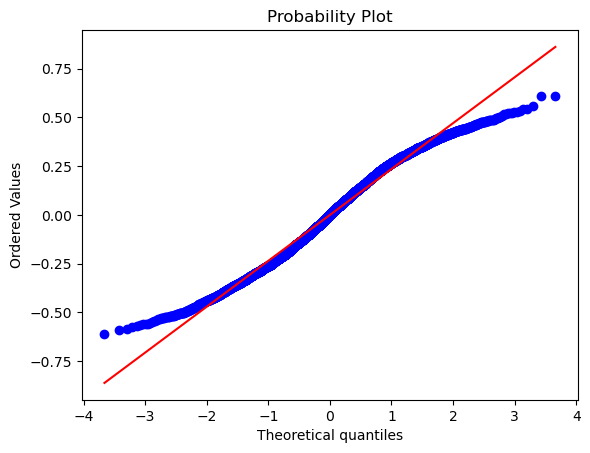

In [130]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist="norm", plot=plt)
plt.show()

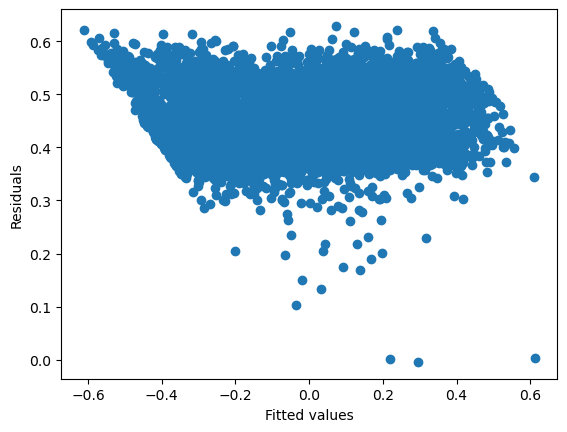

In [132]:
plt.scatter( model.resid, model.fittedvalues,)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


In [134]:
from statsmodels.robust.norms import HuberT

model_robust = sm.RLM(y, X, M=HuberT())
results_robust = model_robust.fit()

print(results_robust.summary())

                       Robust linear Model Regression Results                       
Dep. Variable:     percentage_votos_centrao   No. Observations:                 5503
Model:                                  RLM   Df Residuals:                     5499
Method:                                IRLS   Df Model:                            3
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Fri, 28 Jun 2024                                         
Time:                              10:00:11                                         
No. Iterations:                          14                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

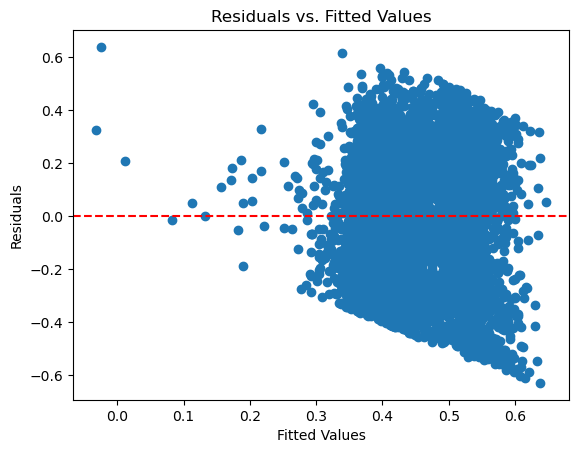

In [136]:
import matplotlib.pyplot as plt
rlm_results = results_robust
# Assuming you have the fitted values and residuals from your RLM model
fitted_values = rlm_results.fittedvalues
residuals = rlm_results.resid

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

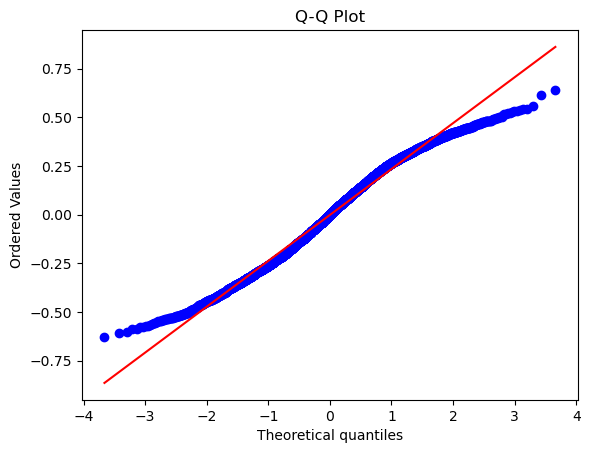

In [137]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [139]:
import numpy as np
X_transformed = np.log(X + 1)
y_transformed = np.log(y + 1)  # Adding 1 to avoid log(0)
model_transformed = sm.RLM(y_transformed, X_transformed, M=sm.robust.norms.HuberT()).fit()
print(model_transformed.summary())


                       Robust linear Model Regression Results                       
Dep. Variable:     percentage_votos_centrao   No. Observations:                 5503
Model:                                  RLM   Df Residuals:                     5499
Method:                                IRLS   Df Model:                            3
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Fri, 28 Jun 2024                                         
Time:                              10:19:07                                         
No. Iterations:                          18                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

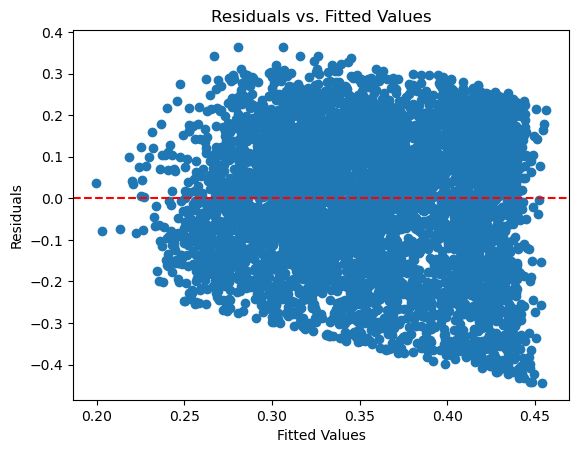

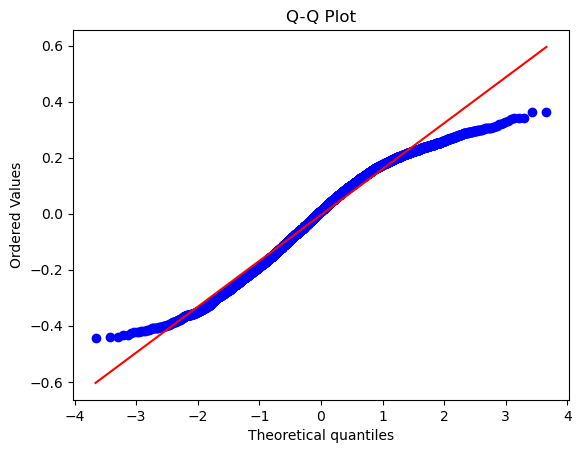

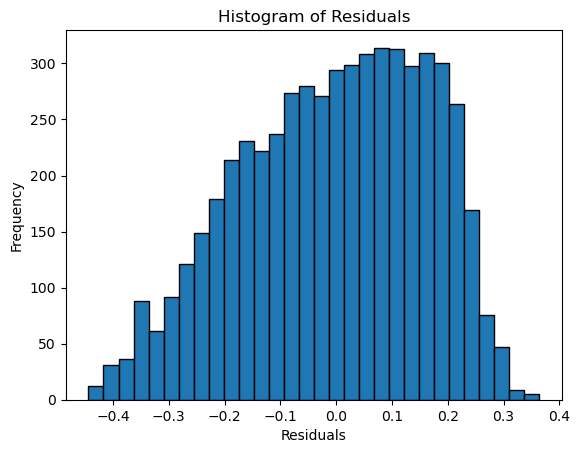

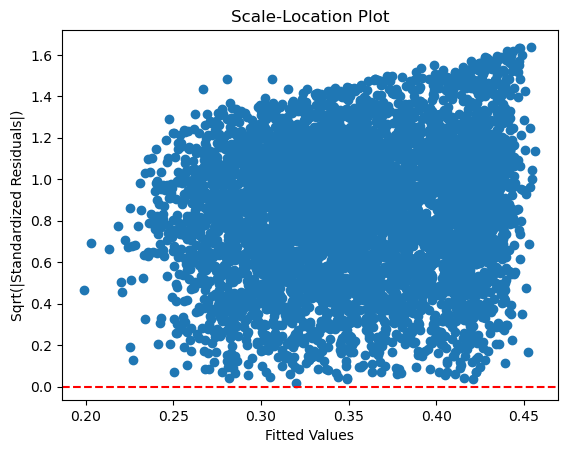

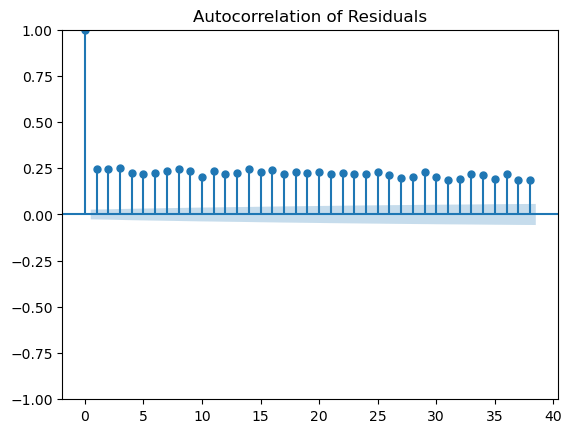

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.regressionplots import plot_leverage_resid2
rlm_results = model_transformed
# Assuming rlm_results is your fitted RLM model
fitted_values = rlm_results.fittedvalues
residuals = rlm_results.resid
standardized_residuals = residuals / np.std(residuals)
sqrt_standardized_residuals = np.sqrt(np.abs(standardized_residuals))

# Residuals vs. Fitted Values
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Histogram of Residuals
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Scale-Location Plot
plt.scatter(fitted_values, sqrt_standardized_residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(|Standardized Residuals|)')
plt.title('Scale-Location Plot')
plt.axhline(0, color='red', linestyle='--')
plt.show()



# Autocorrelation Plot
plot_acf(residuals)
plt.title('Autocorrelation of Residuals')
plt.show()


In [127]:
import statsmodels.api as sm
from statsmodels.robust.norms import HuberT
from sklearn.preprocessing import StandardScaler

# Create the X and y variables for the regression
X = regress_analy[['pib_per_capita', 'taxa_analfabetismo', 'populacao']]
y = regress_analy['percentage_votos_centrao']
# Normalize X
scaler = StandardScaler()
X_normalized = sm.add_constant(scaler.fit_transform(X))


# Fit the regression model
model_robust = sm.RLM(y, X_normalized, M=HuberT())
results = model_robust.fit()

# Print the regression results
print(results.summary())

                       Robust linear Model Regression Results                       
Dep. Variable:     percentage_votos_centrao   No. Observations:                 5503
Model:                                  RLM   Df Residuals:                     5499
Method:                                IRLS   Df Model:                            3
Norm:                                HuberT                                         
Scale Est.:                             mad                                         
Cov Type:                                H1                                         
Date:                      Wed, 26 Jun 2024                                         
Time:                              15:58:36                                         
No. Iterations:                          14                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [143]:
# Breusch-Pagan Test for heteroscedasticity
import statsmodels.stats.api as sms
test = sms.het_breuschpagan(residuals, rlm_results.model.exog)
print(f'Lagrange multiplier statistic: {test[0]}, p-value: {test[1]}')

# Durbin-Watson Test for autocorrelation
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# Jarque-Bera Test for normality
from scipy.stats import jarque_bera
jb_stat, jb_p_value = jarque_bera(residuals)
print(f'Jarque-Bera statistic: {jb_stat}, p-value: {jb_p_value}')

Lagrange multiplier statistic: 339.0673611959829, p-value: 3.473891945124928e-73
Durbin-Watson statistic: 1.5016739165487012
Jarque-Bera statistic: 209.3340978339233, p-value: 3.496859782494418e-46
